In [131]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Assignment
Please complete the following tasks.

1. Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?
2. Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?
3. Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?
4. Plot the distribution of average ETA by hours. How can this plot be explained?

**BONUS** Hexagons. Using the h3 and folium packages, calculate how many sizes 8 hexes contain 80% of all orders from the original data sets and visualise the hexes, colouring them by the number of fails on the map.

# EDA

In [132]:
# Loading in the data 
offers = pd.read_csv("data_offers.csv")
orders = pd.read_csv("data_orders.csv")

## Orders 

In [133]:
orders.shape

(10716, 8)

In [134]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


We have two data sets: data_orders and data_offers, both being stored in a CSV format. The data_orders data set contains the following columns:

**order_datetime**- time of the order

**origin_longitude** - longitude of the order

**origin_latitude** - latitude of the order

**m_order_eta** - time before order arrival

**order_gk** - order number

**order_status_key** - status, an enumeration consisting of the following mapping:

* 4 - cancelled by client,

* 9 - cancelled by system, i.e., a reject

**is_driver_assigned_key** - whether a driver has been assigned

**cancellation_time_in_seconds** - how many seconds passed before cancellation

In [135]:
orders.boxplot(column="m_order_eta")

<Axes: >

In [136]:
# Confirming that these are unique values
orders["order_gk"].value_counts()

order_gk
3000592871241    1
3000583041974    1
3000583116437    1
3000582891479    1
3000582941169    1
                ..
3000582817413    1
3000582541301    1
3000582566041    1
3000583016613    1
3000582765488    1
Name: count, Length: 10716, dtype: int64

In [137]:
# Checking to see if there are any other options 
orders["order_status_key"].value_counts()

order_status_key
4    7307
9    3409
Name: count, dtype: int64

Only cancellations 

In [138]:
orders["is_driver_assigned_key"].value_counts()

is_driver_assigned_key
0    7902
1    2814
Name: count, dtype: int64

In [139]:
# Checking for missing values
orders["cancellations_time_in_seconds"].isna().sum()

np.int64(3409)

## Offers 

In [140]:
offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


The data_offers data set is a simple map with 2 columns:

**order_gk** - order number, associated with the same column from the orders data set

**offer_id** - ID of an offer

## Merging the two datasets

In [141]:
orders_offers = orders.merge(right = offers, how="inner", on = "order_gk")
orders_offers.sample(n=10, random_state=42)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,4,1,223.0,300050725946
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,4,0,91.0,300052014519
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,4,0,68.0,300051458740
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,4,0,125.0,300052031394
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,4,0,11.0,300050671163
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,9,0,NaN,300051413313
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,4,0,6.0,300051090742
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,9,0,NaN,300051125957
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,4,0,113.0,300052078801
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,4,1,47.0,300051178628


In [142]:
orders_offers["order_status_key"] = orders_offers["order_status_key"].replace({4:"Client Cancelled", 9:"System Reject"})
orders_offers["is_driver_assigned_key"] = orders_offers["is_driver_assigned_key"].replace({0:"No", 1: "Yes"})

orders_offers = orders_offers.rename(columns={
    "order_datetime" : "order_time",
    "is_driver_assigned_key" : "is_driver_assigned",
    "order_status_key" : "order_status"
})

orders_offers.sample(n=10, random_state=42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status,is_driver_assigned,cancellations_time_in_seconds,offer_id
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,Client Cancelled,Yes,223.0,300050725946
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,Client Cancelled,No,91.0,300052014519
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,Client Cancelled,No,68.0,300051458740
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,Client Cancelled,No,125.0,300052031394
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,Client Cancelled,No,11.0,300050671163
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,System Reject,No,NaN,300051413313
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,Client Cancelled,No,6.0,300051090742
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,System Reject,No,NaN,300051125957
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,Client Cancelled,No,113.0,300052078801
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,Client Cancelled,Yes,47.0,300051178628


### Summary of data cleaning 
1. Renamed the order_datetime,is_driver_assigned_key and order_status_key to easier to read column names
2. Replaced keys with string represenetation to improve readability 

# Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?


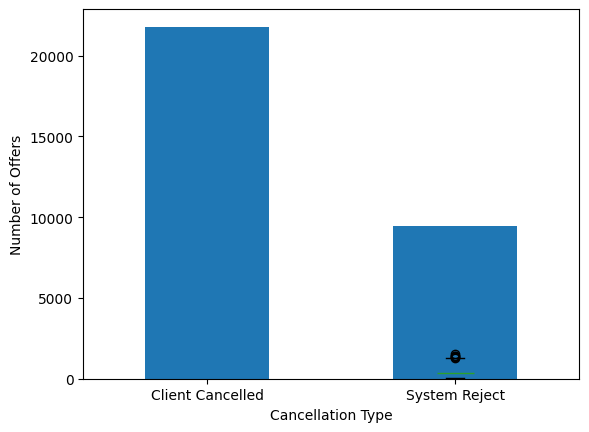

In [143]:

orders_offers["order_status"].value_counts().plot(kind="bar")
plt.xlabel("Cancellation Type")
plt.ylabel("Number of Offers")
plt.xticks(rotation = 0)

plt.show()

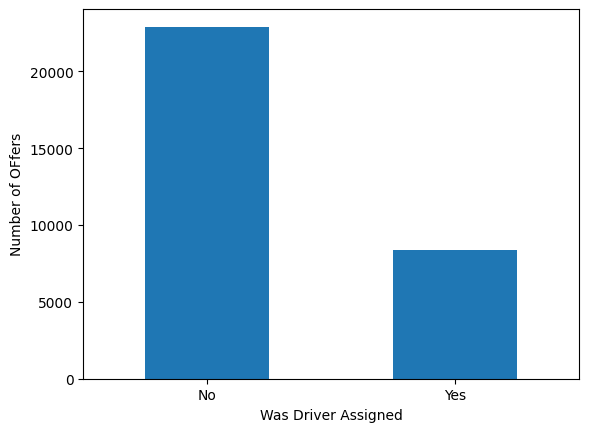

In [144]:
fig,ax = plt.subplots()
orders_offers["is_driver_assigned"].value_counts().plot(ax = ax,kind="bar")
plt.xlabel("Was Driver Assigned")
plt.ylabel("Number of OFfers")
plt.xticks(rotation = 0)

plt.show()

Grouped bar chart

In [145]:
grouped_counts = orders_offers.groupby(['is_driver_assigned','order_status']).size()

grouped_counts

is_driver_assigned  order_status    
No                  Client Cancelled    13435
                    System Reject        9469
Yes                 Client Cancelled     8360
                    System Reject           4
dtype: int64

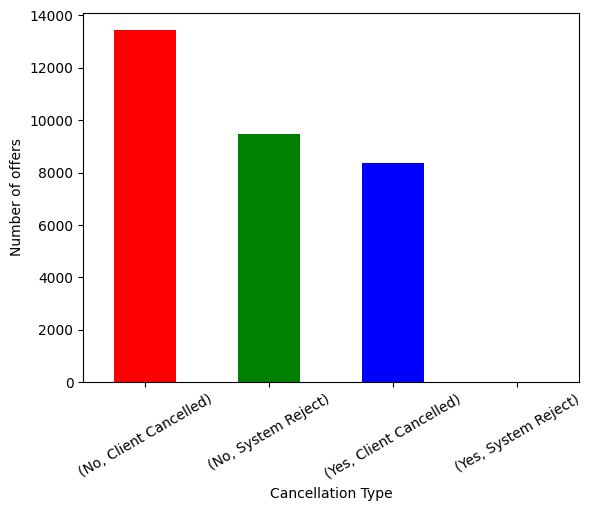

In [146]:
group_labels = {
    ("No","Client Cancelled") : "Meow",
    ("No","System Reject") : "Maow",
    ("Yes","Client Cancelled") : "Test"
}

grouped_counts.plot(kind="bar",color=["red","green","blue","blue"],subplots=False)
plt.xticks(rotation = 30)
plt.ylabel("Number of offers")
plt.xlabel("Cancellation Type")
plt.show()

The highest number of cancellations result when there is **No driver assigned** and **Cancelled by the Client**

# Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?


In [147]:
orders_offers.dtypes

order_time                        object
origin_longitude                 float64
origin_latitude                  float64
m_order_eta                      float64
order_gk                           int64
order_status                      object
is_driver_assigned                object
cancellations_time_in_seconds    float64
offer_id                           int64
dtype: object

In [148]:
orders_offers["order_time"]

0        18:08:07
1        20:57:32
2        20:57:32
3        20:57:32
4        12:07:50
           ...   
31263    12:44:11
31264    12:42:52
31265    13:11:35
31266    13:17:21
31267    11:49:35
Name: order_time, Length: 31268, dtype: object

In [149]:
orders_offers["order_time"] = pd.to_datetime(orders_offers["order_time"], format =  "%H:%M:%S")

In [150]:
orders_offers.dtypes

order_time                       datetime64[ns]
origin_longitude                        float64
origin_latitude                         float64
m_order_eta                             float64
order_gk                                  int64
order_status                             object
is_driver_assigned                       object
cancellations_time_in_seconds           float64
offer_id                                  int64
dtype: object

In [151]:
# Adding an hours column 
orders_offers["hour"] = orders_offers["order_time"].dt.hour

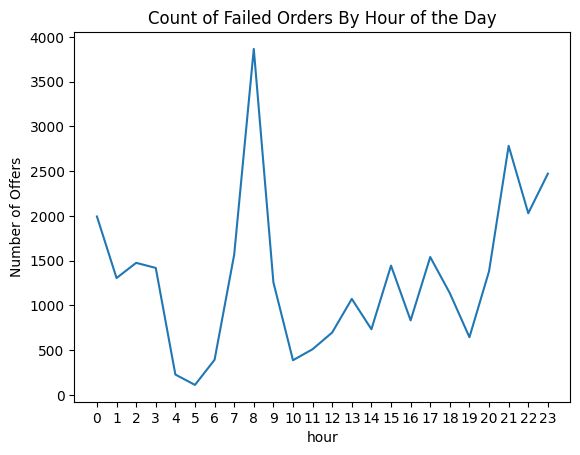

In [152]:
# Visualising the number of cancelled offers by hour
grouped_counts_hours = orders_offers.groupby(['hour'])["order_gk"].count()
grouped_counts_hours.plot(kind = "line")
plt.xticks(range(0,24),rotation = 0)
plt.ylabel("Number of Offers")
plt.title("Count of Failed Orders By Hour of the Day")
plt.show()

In [153]:
# Using the group_by() function 
grouped_counts_hours_type = orders_offers.groupby(['hour',"is_driver_assigned","order_status"])["order_gk"].count()
print(grouped_counts_hours_type)

hour  is_driver_assigned  order_status    
0     No                  Client Cancelled     957
                          System Reject        706
      Yes                 Client Cancelled     326
                          System Reject          4
1     No                  Client Cancelled     633
                                              ... 
22    No                  System Reject        660
      Yes                 Client Cancelled     415
23    No                  Client Cancelled    1144
                          System Reject        883
      Yes                 Client Cancelled     444
Name: order_gk, Length: 73, dtype: int64


In [154]:
# Alternatively we can use the pivot table function 
grouped_counts_hours_type_pvt = orders_offers.pivot_table(values= "order_gk",index= "hour", columns=["is_driver_assigned", "order_status"],aggfunc="count")
grouped_counts_hours_type_pvt

is_driver_assigned               No                            Yes  \
order_status       Client Cancelled System Reject Client Cancelled   
hour                                                                 
0                             957.0         706.0            326.0   
1                             633.0         374.0            298.0   
2                             586.0         649.0            240.0   
3                             565.0         658.0            195.0   
4                              90.0          45.0             92.0   
5                              31.0          33.0             47.0   
6                             169.0         109.0            114.0   
7                             523.0         526.0            517.0   
8                            1447.0        1338.0           1080.0   
9                             470.0         294.0            494.0   
10                            122.0          37.0            228.0   
11                            155.0          65.0            290.0   
12                            321.0          91.0            285.0   
13                            436.0         294.0            342.0   
14                            311.0         125.0            297.0   
15                            610.0         335.0            499.0   
16                            381.0         112.0            339.0   
17                            756.0         319.0            465.0   
18                            447.0         314.0            375.0   
19                            242.0          95.0            307.0   
20                            664.0         371.0            346.0   
21                           1421.0        1036.0            325.0   
22                            954.0         660.0            415.0   
23                           1144.0         883.0            444.0   

is_driver_assigned                
order_status       System Reject  
hour                              
0                            4.0  
1                            NaN  
2                            NaN  
3                            NaN  
4                            NaN  
5                            NaN  
6                            NaN  
7                            NaN  
8                            NaN  
9                            NaN  
10                           NaN  
11                           NaN  
12                           NaN  
13                           NaN  
14                           NaN  
15                           NaN  
16                           NaN  
17                           NaN  
18                           NaN  
19                           NaN  
20                           NaN  
21                           NaN  
22                           NaN  
23                           NaN

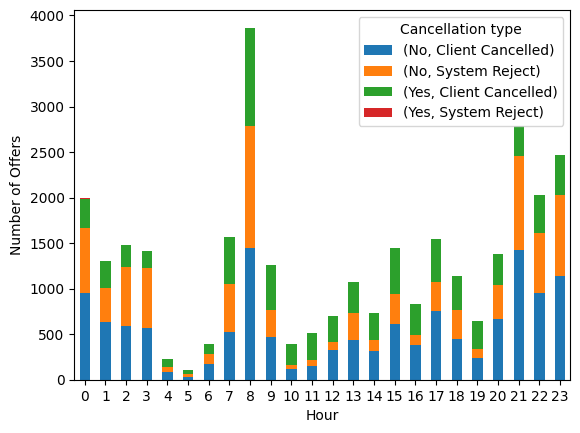

In [155]:
grouped_counts_hours_type_pvt.plot(kind= "bar", stacked=True)
plt.xticks(rotation = 0)
plt.xlabel("Hour")
plt.ylabel("Number of Offers")
plt.legend(title = "Cancellation type", loc = 0)

plt.show()

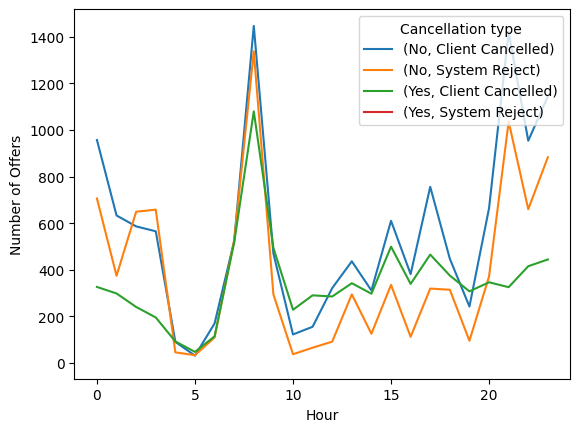

In [156]:
grouped_counts_hours_type_pvt.plot(kind= "line")
plt.xticks(rotation = 0)
plt.xlabel("Hour")
plt.ylabel("Number of Offers")
plt.legend(title = "Cancellation type", loc = 0)
plt.show()

The four system rejects with the assigned driver occurred around midnight (see the output of the grouped DataFrame). The rest of the categories follow similar distribution, with the client cancellations with the assigned driver having a substantially lower count during the night hours.

# Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?


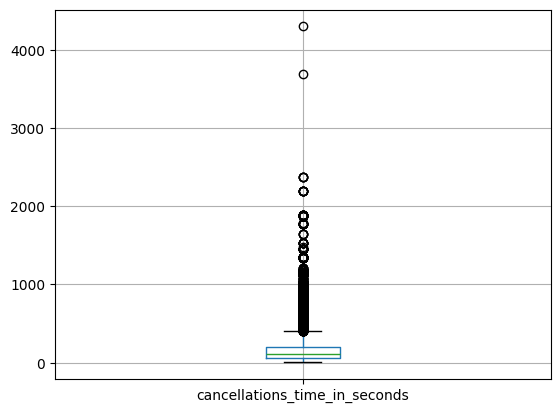

In [157]:
# Investigating outliers in the data 
orders_offers.boxplot(column = "cancellations_time_in_seconds")
plt.show()

In [158]:
investigation = orders_offers[orders_offers["cancellations_time_in_seconds"] > 2000]
investigation.shape

(13, 10)

In [159]:
# Going to remove these 13 records as clear outliers from the rest of the data 
cancellation_time_cleaned = orders_offers[orders_offers["cancellations_time_in_seconds"] < 2000]

In [160]:
cancellation_time_pvt = orders_offers.pivot_table(index = "hour",values="cancellations_time_in_seconds", columns="is_driver_assigned",aggfunc="mean")
cancellation_time_pvt

is_driver_assigned,No,Yes
hour,,
0,115.126437,276.082822
1,100.593997,296.312081
2,121.305461,301.466667
3,129.182301,368.682051
4,100.733333,245.250000
5,102.838710,156.617021
6,202.952663,225.508772
7,141.177820,177.640232
8,132.625432,172.896296


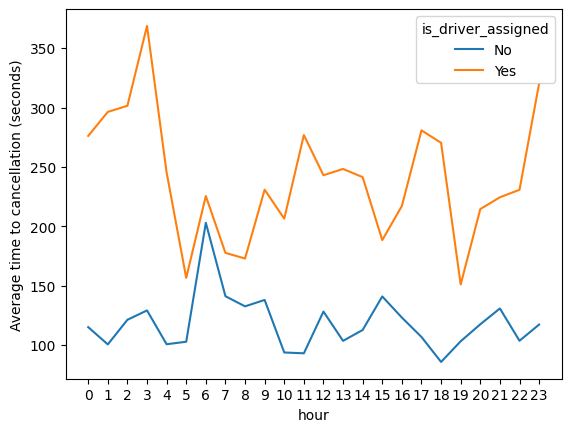

In [161]:
# Plotting the results 
cancellation_time_pvt.plot(kind="line")
plt.xlabel("hour")
plt.ylabel("Average time to cancellation (seconds)")
plt.xticks(range(0,24))
plt.show()

The average time to cancellation is lower when there is not a driver assigned. The longest average cancellation time occurs at 3 am 

# Plot the distribution of average ETA by hours. How can this plot be explained?


In [162]:
eta_time_pvt = orders_offers.pivot_table(index = "hour",values=("m_order_eta"),aggfunc="mean")
eta_time_pvt

,m_order_eta
hour,
0,375.433333
1,355.322148
2,389.554167
3,381.492308
4,266.119565
5,476.787234
6,489.456140
7,642.746615
8,671.086111


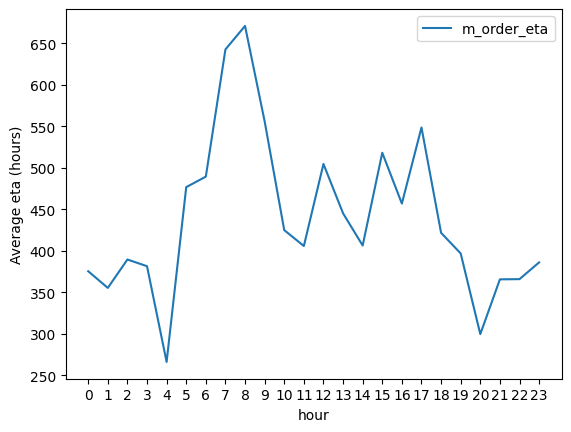

In [163]:
# Plotting the results 
eta_time_pvt.plot(kind="line")
plt.xlabel("hour")
plt.ylabel("Average eta (hours)")
plt.xticks(range(0,24))
plt.show()

The line very closely matches the count of failed orders per hour, indicating that the number of failed orders increases as the average waiting time of the client increases.